In [1]:
from helpers import *

In [2]:
df = pd.read_csv("full_data_undersample.csv").drop(columns=["customer_unique_id", "last_order_date"], axis=1)
print(df.shape)
df.head()

(5994, 20)


,avg_delivery_delay,items_nb,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency_score,frequency_score,monetary_score,rfm_score
0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,2,112
1,10.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1,2,312
2,27.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,5,415
3,5.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,1,3,513
4,20.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,1,2,412


In [3]:
df = normalize_dataframe(df.copy())

pca = PCA(n_components=2)  
df_pca = pca.fit_transform(df)  

tsne = TSNE(random_state=42)
df_tsne = tsne.fit_transform(df)
df_tsne_pca = tsne.fit_transform(df_pca)

In [4]:
# KMEANS
n_clusters = np.arange(3, 16, 1)  
algorithms = ["lloyd", "elkan"]
scores_df_kmeans = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  
for n_cluster in n_clusters: 
    for algo in algorithms: 
        (n1, silhouette1, calinski_harabasz1, davies_bouldin1, _) = calculate_score_kmeans(df_pca, n_cluster, algo)
        (n2, silhouette2, calinski_harabasz2, davies_bouldin2, _) = calculate_score_kmeans(df_tsne_pca, n_cluster, algo)
        (n3, silhouette3, calinski_harabasz3, davies_bouldin3, _) = calculate_score_kmeans(df_tsne, n_cluster, algo)
        
        scores_df_kmeans = pd.concat([scores_df_kmeans, pd.DataFrame.from_records([{'n_cluster': n1, 'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1, 'type': f"kmeans-pca-{algo}"}])])
        scores_df_kmeans = pd.concat([scores_df_kmeans, pd.DataFrame.from_records([{'n_cluster': n2, 'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2, 'type': f"kmeans-tse-pca-{algo}"}])])
        scores_df_kmeans = pd.concat([scores_df_kmeans, pd.DataFrame.from_records([{'n_cluster': n3, 'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3, 'type': f"kmeans-tse-{algo}"}])])

In [5]:
# AGGLOMERATIVE  
n_clusters = np.arange(3, 16, 1)  
linkages = ["ward", "complete", "average", "single"]  
scores_df_agglomerative = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  

for n_cluster in n_clusters:  
    for linkage in linkages:  
        (n1, silhouette1, calinski_harabasz1, davies_bouldin1, _) = calculate_score_agglomerative(df_pca, n_cluster, linkage)
        (n2, silhouette2, calinski_harabasz2, davies_bouldin2, _) = calculate_score_agglomerative(df_tsne_pca, n_cluster, linkage)
        (n3, silhouette3, calinski_harabasz3, davies_bouldin3, _) = calculate_score_agglomerative(df_tsne, n_cluster, linkage)
          
        scores_df_agglomerative = pd.concat([scores_df_agglomerative, pd.DataFrame.from_records([{'n_cluster': n1, 'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1, 'type': f"agglo-pca-{linkage}"}])])
        scores_df_agglomerative = pd.concat([scores_df_agglomerative, pd.DataFrame.from_records([{'n_cluster': n2, 'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2, 'type': f"agglo-tse-pca-{linkage}"}])])
        scores_df_agglomerative = pd.concat([scores_df_agglomerative, pd.DataFrame.from_records([{'n_cluster': n3, 'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3, 'type': f"agglo-tse-{linkage}"}])])
  

In [6]:
# "gaussian_mixture": {  
#     "n_components": n_clusters,  
#     "covariance_type": ["full", "tied", "diag", "spherical"]  
# },
# GAUSSIAN MIXTURE
n_components = np.arange(3, 16, 1)  
covariance_type = ["full", "tied", "diag", "spherical"]
scores_df_gaussian = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  
for n_component in n_components: 
    for covariance in covariance_type: 
        (n1, silhouette1, calinski_harabasz1, davies_bouldin1, _) = calculate_score_gaussian_mixture(df_pca, n_component, covariance)
        (n2, silhouette2, calinski_harabasz2, davies_bouldin2, _) = calculate_score_gaussian_mixture(df_tsne_pca, n_component, covariance)
        (n3, silhouette3, calinski_harabasz3, davies_bouldin3, _) = calculate_score_gaussian_mixture(df_tsne, n_component, covariance)
        
        scores_df_gaussian = pd.concat([scores_df_gaussian, pd.DataFrame.from_records([{'n_cluster': n1, 'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1, 'type': f"gaussian-pca-{covariance}"}])])
        scores_df_gaussian = pd.concat([scores_df_gaussian, pd.DataFrame.from_records([{'n_cluster': n2, 'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2, 'type': f"gaussian-tse-pca-{covariance}"}])])
        scores_df_gaussian = pd.concat([scores_df_gaussian, pd.DataFrame.from_records([{'n_cluster': n3, 'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3, 'type': f"gaussian-tse-{covariance}"}])])

In [7]:
# eps = np.arange(0.5, 10, 0.5)  
# min_samples = np.arange(5, 20, 5)
eps = np.arange(0.5, 20, 0.5)  
min_samples = np.arange(5, 100, 10)
scores_df_dbscan = pd.DataFrame(columns=['n_cluster','silhouette',"calinski_harabasz","davies_bouldin", 'type'])  

for eps_param in eps: 
    for min_samples_param in min_samples: 
            (n1, silhouette1, calinski_harabasz1, davies_bouldin1, dbscan1) = calculate_score_dbscan(df_pca, eps=eps_param, min_samples=min_samples_param)
            (n2, silhouette1, calinski_harabasz1, davies_bouldin1, dbscan2) = calculate_score_dbscan(df_tsne_pca, eps=eps_param, min_samples=min_samples_param)
            (n3, silhouette1, calinski_harabasz1, davies_bouldin1, dbscan3) = calculate_score_dbscan(df_tsne, eps=eps_param, min_samples=min_samples_param)

            scores_df_dbscan = pd.concat([scores_df_dbscan, pd.DataFrame.from_records([{'n_cluster': n1,'silhouette': silhouette1, "calinski_harabasz": calinski_harabasz1, "davies_bouldin": davies_bouldin1,  'type': f"dbscan-pca-{eps_param}-{min_samples_param}"}])])
            scores_df_dbscan = pd.concat([scores_df_dbscan, pd.DataFrame.from_records([{'n_cluster': n2,'silhouette': silhouette2, "calinski_harabasz": calinski_harabasz2, "davies_bouldin": davies_bouldin2,  'type': f"dbscan-tse-pca-{eps_param}-{min_samples_param}"}])])
            scores_df_dbscan = pd.concat([scores_df_dbscan, pd.DataFrame.from_records([{'n_cluster': n3,'silhouette': silhouette3, "calinski_harabasz": calinski_harabasz3, "davies_bouldin": davies_bouldin3,  'type': f"dbscan-tse-{eps_param}-{min_samples_param}"}])])


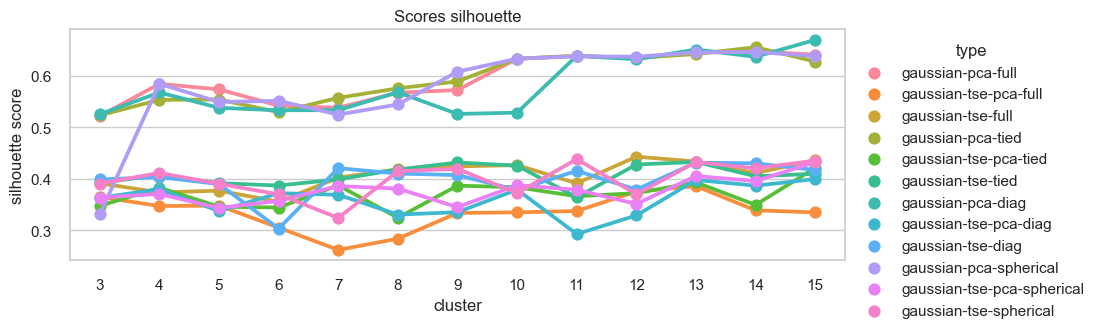

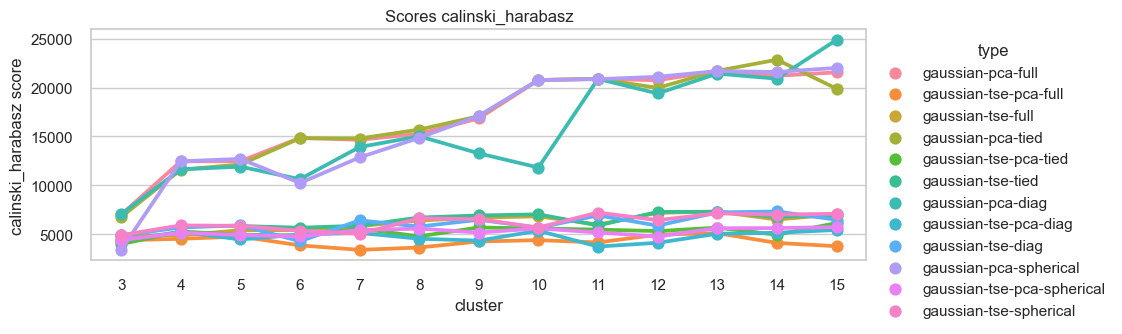

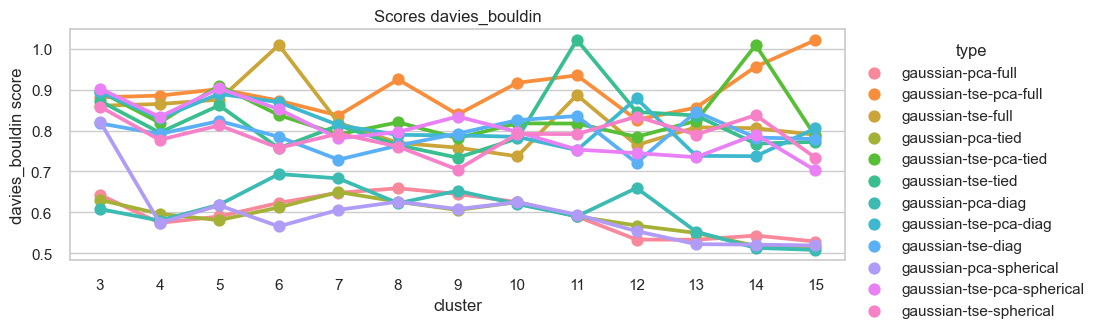

In [23]:
scores_df_final = scores_df_gaussian.copy()
scores_df_visual = scores_df_final[(scores_df_final["n_cluster"] < 20) & (scores_df_final["n_cluster"] > 1)]

sns.set(style="whitegrid")  
plt.figure(figsize=(10, 3))  
sns.pointplot(data=scores_df_visual, x='n_cluster', y='silhouette', hue="type")  
plt.title('Scores silhouette')
plt.xlabel('cluster')  
plt.ylabel('silhouette score')  
plt.legend(title='type', bbox_to_anchor=(1, 1))  
plt.show()  

sns.set(style="whitegrid")  
plt.figure(figsize=(10, 3))  
sns.pointplot(data=scores_df_visual, x='n_cluster', y='calinski_harabasz', hue="type")  
plt.title('Scores calinski_harabasz')
plt.xlabel('cluster')  
plt.ylabel('calinski_harabasz score')  
plt.legend(title='type', bbox_to_anchor=(1, 1))  
plt.show()  

sns.set(style="whitegrid")  
plt.figure(figsize=(10, 3))  
sns.pointplot(data=scores_df_visual, x='n_cluster', y='davies_bouldin', hue="type")  
plt.title('Scores davies_bouldin')
plt.xlabel('cluster')  
plt.ylabel('davies_bouldin score')  
plt.legend(title='type', bbox_to_anchor=(1, 1))  
plt.show()  

0.6333289888819341


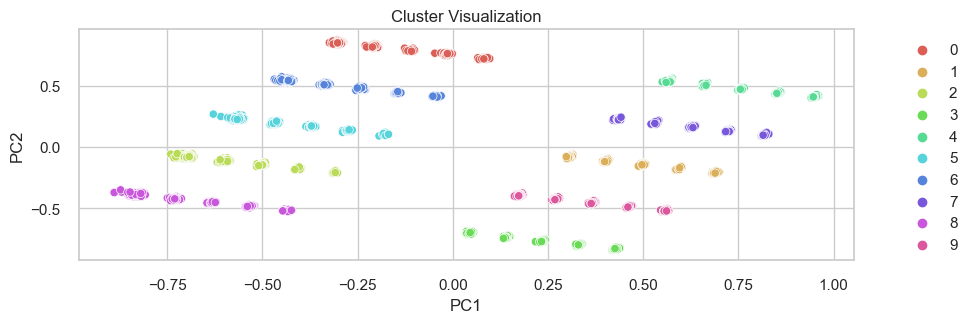

In [9]:
  # Fit Kmeans model  
kmeans = KMeans(n_clusters=10, n_init="auto")  
kmeans.fit(df_pca) 

# Predict cluster labels  
labels = kmeans.predict(df_pca)  

print(silhouette_score(df_pca, labels))

df_clusters = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])  
df_clusters['Cluster'] = labels
# Define the colors for each cluster label  
colors = sns.color_palette('hls', len(df_clusters['Cluster'].unique()))  

# Create a scatter plot  
plt.figure(figsize=(10, 3))  
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette=colors, data=df_clusters)  
plt.title('Cluster Visualization')  
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper left',  bbox_to_anchor=(1.05, 1))  

plt.show()

In [10]:
X_test = pd.DataFrame(df, index=df.index, columns=df.columns)
X_test["cluster_labels"] = labels

X_test_clusters = X_test.groupby("cluster_labels").mean()
plot_radars(data=X_test_clusters, group="cluster_labels")

In [11]:
# show_segmentation(df_pca, 13)

In [12]:
# Kmeans > Score
### Kmeans with PCA
### Kmeans with TSNE
### Kmeans with PCA & TSNE

# DB Scan > Score
### DB Scan with PCA
### DB Scan with TSNE
### DB Scan with PCA & TSNE

## TSNE PCA

Projecting 21-dimensional data to 2D


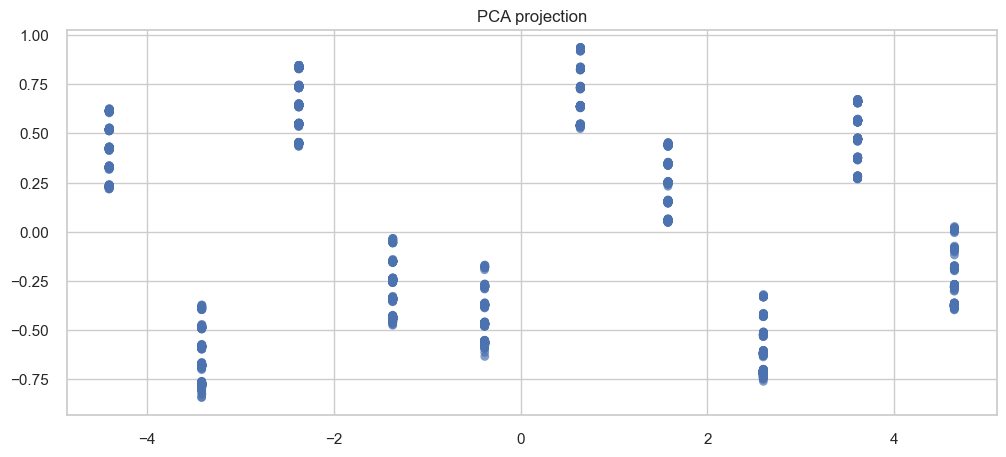

In [13]:
pca = PCA(n_components=2)
X = df
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], 
            edgecolor='none', alpha=0.7, s=40)
plt.title('PCA projection')
plt.show()

In [14]:
df

,avg_delivery_delay,items_nb,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,...,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency_score,frequency_score,monetary_score,rfm_score,cluster_labels
0,0.010256,0.041667,0.833333,0.0,0.0,0.00,0.00,0.0,0.00,0.000,...,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.25,0.002252,4
1,0.056410,0.041667,1.000000,0.0,0.0,0.00,0.00,0.0,0.00,0.000,...,0.0,0.0,0.0,0.0,0.25,0.50,0.0,0.25,0.452703,1
2,0.143590,0.041667,0.500000,0.0,0.0,0.00,0.00,0.0,0.25,0.000,...,0.0,0.0,0.0,0.0,0.00,0.75,0.0,1.00,0.684685,9
3,0.030769,0.041667,1.000000,0.0,0.0,0.00,0.00,0.0,0.25,0.000,...,0.0,0.0,0.0,0.0,0.00,1.00,0.0,0.50,0.905405,3
4,0.107692,0.041667,1.000000,0.0,0.0,0.25,0.00,0.0,0.00,0.000,...,0.0,0.0,0.0,0.0,0.00,0.75,0.0,0.25,0.677928,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5989,0.000000,0.041667,0.666667,0.0,0.0,0.00,0.00,0.0,0.00,0.125,...,0.0,0.0,0.0,0.0,0.00,1.00,1.0,0.50,0.995495,8
5990,0.064103,0.083333,0.666667,0.0,0.0,0.00,0.50,0.0,0.00,0.000,...,0.0,0.0,0.0,0.0,0.00,0.00,1.0,0.25,0.092342,0
5991,0.189744,0.083333,0.750000,0.0,0.0,0.00,0.25,0.0,0.00,0.125,...,0.0,0.0,0.0,0.0,0.00,0.25,1.0,1.00,0.324324,6
5992,0.090598,0.125000,0.888889,0.0,0.0,0.00,0.25,0.0,0.00,0.250,...,0.0,0.0,0.0,0.0,0.00,0.25,1.0,0.50,0.319820,6


In [15]:
tsne = TSNE(random_state=42)
X_tsne_pca = tsne.fit_transform(X_reduced)

Text(0.5, 1.0, 'TSNE with PCA')

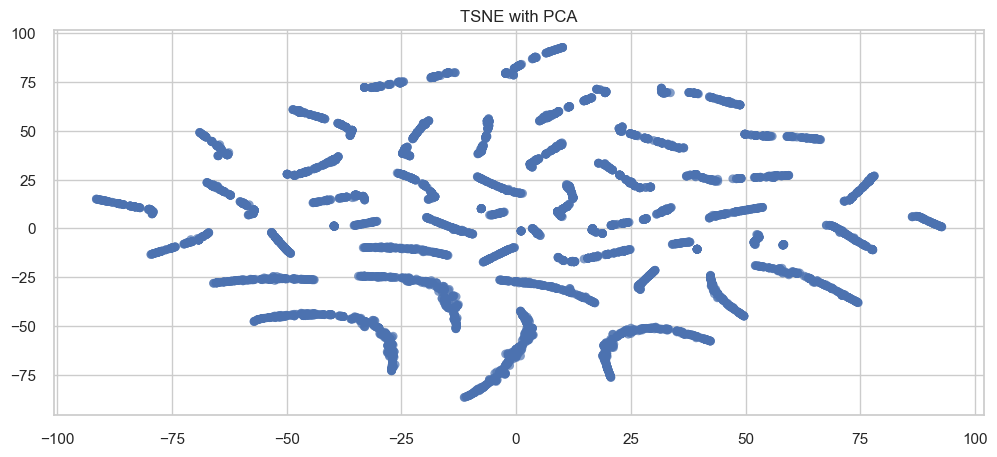

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1],
            edgecolor='none', alpha=0.7, s=40)
plt.title('TSNE with PCA')

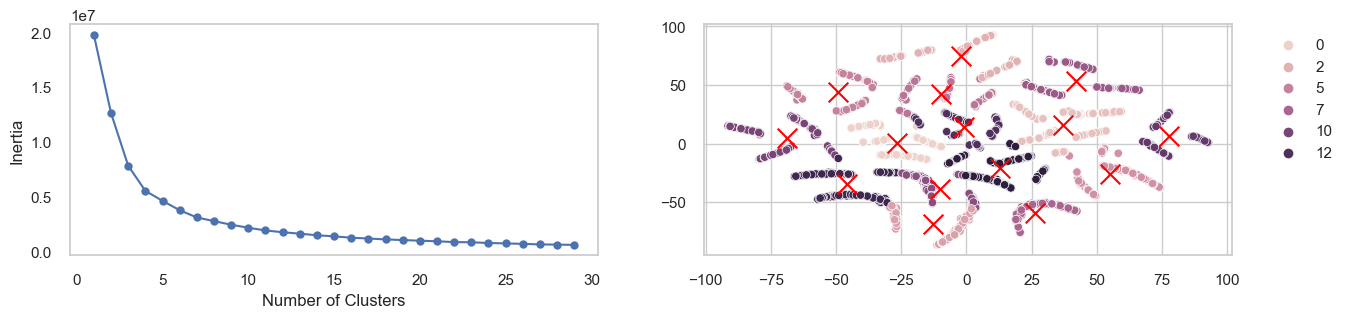

<Figure size 1000x300 with 0 Axes>

In [17]:
show_segmentation(X_tsne_pca, 15)

In [18]:
X_reduced.shape

(5994, 2)

In [19]:
X_reduced

array([[ 0.64062561,  0.83347106],
       [ 3.60675578,  0.56682779],
       [-4.40025653,  0.23351268],
       ...,
       [-1.36753223, -0.4390902 ],
       [-1.36683787, -0.25636901],
       [ 4.64286371, -0.08570516]])

In [20]:
X_tsne_pca.shape

(5994, 2)

In [21]:
X_tsne_pca

array([[  7.2647038,  57.21653  ],
       [ 63.24786  ,  46.31306  ],
       [-77.80301  , -12.018894 ],
       ...,
       [-19.326641 , -27.93931  ],
       [ -9.683618 ,  -2.6954226],
       [ 51.86943  ,  -6.9880233]], dtype=float32)

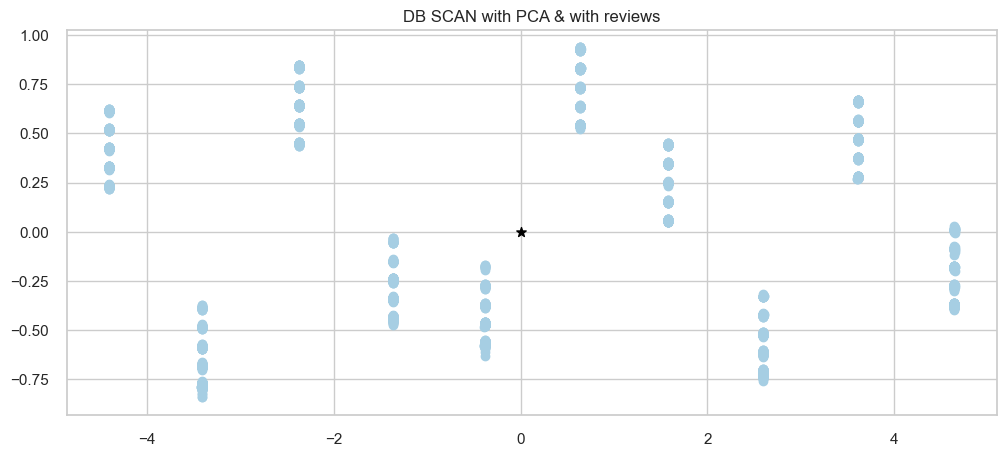

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [22]:
cluster_labels = do_dbscan(X_reduced, "DB SCAN with PCA & with reviews", eps=9, min_samples=100)

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



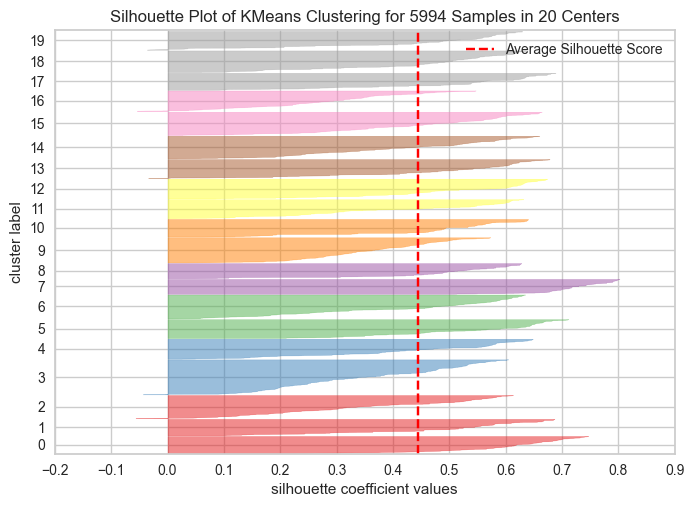

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5994 Samples in 20 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Instantiate the clustering model and visualizer 
model = KMeans(20)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_tsne_pca)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

#### PCA Explainability (without review)

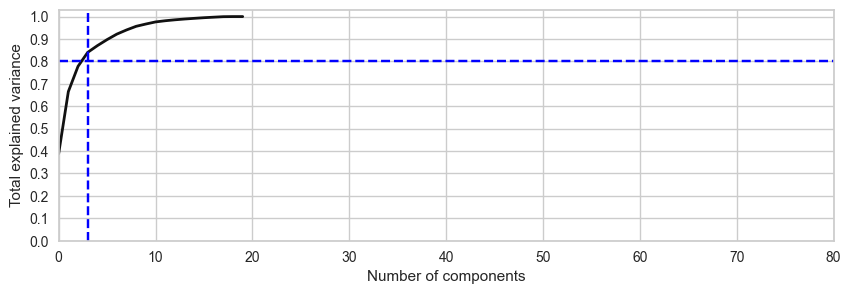

3


In [ ]:
pca = PCA().fit(df)

plt.figure(figsize=(10,3))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 80)
plt.yticks(np.arange(0, 1.1, 0.1))

x_value = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)[0][0]  

# Add vertical lines  
plt.axvline(x_value, color='blue', linestyle='--')  
plt.axhline(0.8, color='blue', linestyle='--')  

plt.show()
print(x_value)

In [ ]:
# perform PCA on the data
pca = PCA(n_components=1)  
pca.fit(df)  
  
# get the loadings for the first principal component  
loadings = pca.components_[0]  
  
# create a dataframe to display the loadings  
loadings_df = pd.DataFrame({'Feature': df.columns, 'Loading': loadings})  
loadings_df = loadings_df.sort_values('Loading', ascending=False)  
  
print(loadings_df)  

                         Feature   Loading
0             avg_delivery_delay  0.002346
4                      cat_Books -0.001181
11                     cat_Music -0.001826
7            cat_Food and Drinks -0.004794
12                      cat_Pets -0.005745
3                       cat_Auto -0.007600
10             cat_Miscellaneous -0.007877
2               avg_satisfaction -0.008551
13                    cat_Sports -0.009308
15               cat_Toys & Baby -0.009955
14                     cat_Tools -0.023088
8          cat_Health and Beauty -0.024868
6                    cat_Fashion -0.027447
5   cat_Electronics & Appliances -0.028027
9           cat_Home & Furniture -0.046139
1                       items_nb -0.053742
16                 recency_score -0.249358
19                     rfm_score -0.303145
18                monetary_score -0.378204
17               frequency_score -0.833507


In [ ]:
explained_variance = pca.explained_variance_ratio_[0] # explained variance of the first principal component  
feature_contrib = loadings_df['Loading'].apply(lambda x: x**2)  
loadings_df["Contribution"] = round(feature_contrib / feature_contrib.sum() * explained_variance,5) 

In [ ]:
loadings_df

,Feature,Loading,Contribution
0,avg_delivery_delay,0.002346,0.00000
4,cat_Books,-0.001181,0.00000
11,cat_Music,-0.001826,0.00000
7,cat_Food and Drinks,-0.004794,0.00001
12,cat_Pets,-0.005745,0.00001
3,cat_Auto,-0.007600,0.00002
10,cat_Miscellaneous,-0.007877,0.00002
2,avg_satisfaction,-0.008551,0.00003
13,cat_Sports,-0.009308,0.00003
15,cat_Toys & Baby,-0.009955,0.00004


/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/m/.pyenv/versions/3.10.12/lib

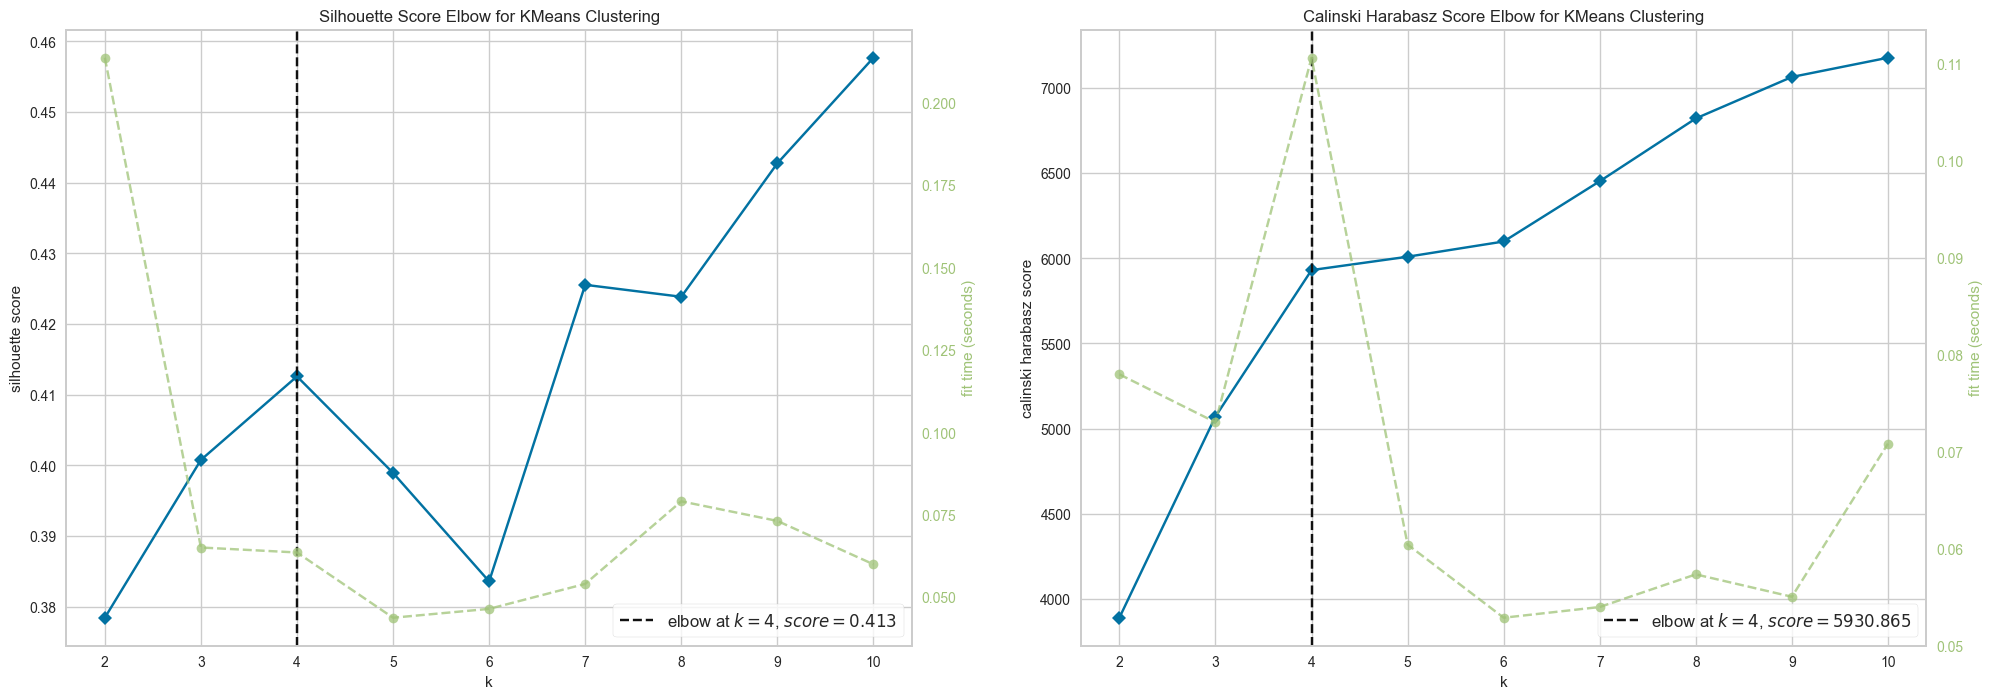

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.pipeline import Pipeline, make_pipeline

# Elbow method with differents metrics
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(24,8))
for m in metrics:
    kmeans_visualizer = Pipeline([
        ("kelbowvisualizer", KElbowVisualizer(KMeans(),
                                              K=(4,10),
                                              metric=m,
                                              ax=axes[i]))])
    kmeans_visualizer.fit(X_tsne_pca)
    kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
    i+=1

plt.show()

In [ ]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index=data.index,
                        columns=data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()

In [ ]:
from sklearn.compose import ColumnTransformer, make_column_transformer

X_test = pd.DataFrame(X, index=X.index, columns=X.columns)
X_test["cluster_labels"] = cluster_labels

X_test_clusters = X_test.groupby("cluster_labels").mean()
X_test_clusters

,avg_delivery_delay,items_nb,avg_satisfaction,cat_Auto,cat_Books,cat_Electronics & Appliances,cat_Fashion,cat_Food and Drinks,cat_Health and Beauty,cat_Home & Furniture,cat_Miscellaneous,cat_Music,cat_Pets,cat_Sports,cat_Tools,cat_Toys & Baby,recency_score,frequency_score,monetary_score,rfm_score
cluster_labels,,,,,,,,,,,,,,,,,,,,
-1,0.025641,0.041667,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.375000,0.0,0.000000,0.337838
0,0.067076,0.045825,0.855622,0.017299,0.000000,0.045409,0.026946,0.003327,0.029940,0.038174,0.000000,0.004990,0.008649,0.007984,0.000000,0.022954,0.000000,0.0,0.460579,0.004149
1,0.078351,0.045616,0.803675,0.016119,0.000967,0.056093,0.017892,0.003868,0.032398,0.038685,0.000000,0.001934,0.005158,0.010199,0.000000,0.014990,0.500484,0.0,0.476306,0.455177
2,0.054754,0.046789,0.857187,0.018043,0.005046,0.045413,0.028440,0.004281,0.040138,0.036468,0.000000,0.002752,0.006422,0.007840,0.000000,0.015596,0.880963,0.0,0.503670,0.798198
3,0.068490,0.045492,0.831380,0.006510,0.005859,0.046875,0.032715,0.000000,0.030762,0.038330,0.000000,0.003906,0.002604,0.009055,0.000000,0.022461,0.248535,0.0,0.463867,0.228085
4,0.064973,0.044151,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000417,0.000000,0.000000,0.405963,0.0,0.537844,0.370578
5,0.066931,0.053495,0.815054,0.000000,0.000000,0.003226,0.000000,0.000000,0.000000,0.002419,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.519355,0.0,0.501613,0.472406
6,0.063544,0.105189,0.843570,0.019798,0.004838,0.078996,0.050801,0.008008,0.057891,0.087921,0.048215,0.004838,0.011678,0.018685,0.045379,0.028779,0.537788,1.0,0.778111,0.581594


In [ ]:
plot_radars(data=X_test_clusters, group="cluster_labels")

In [ ]:
plot_radars(data=X_test_clusters.drop(columns=["rfm_score"],axis=1), group="cluster_labels")